In [24]:

import scipy 
import librosa
import numpy as np
import matplotlib.pylab as plt
import dspfunc
import math
from numpy.linalg import norm

In [ ]:
#train coin path
train_c1_path = dspfunc.getPath("./soundv2/a",1,5)
train_c5_path = dspfunc.getPath("./soundv2/a",5,5)
train_c10_path = dspfunc.getPath("./soundv2/a",10,5)

#pre config
kernal_size = (17,21)
n_fft = 256
hop = 32
hop_odf = 256
band_edges_hz =(5000,10000,10000,15000)
test_path = "./test/1.10.5.t1.mp3"
coin_maping = {0:"1 bath",1:"5 bath",2:"10 bath"}

In [26]:
# load sound
path="./test/1.10.5.t1.mp3"
y, sr = librosa.load( path,sr=None) 

In [27]:
#HPF
filtered_signal = dspfunc.butter_filter(y,6,5000,sr,type="highpass")

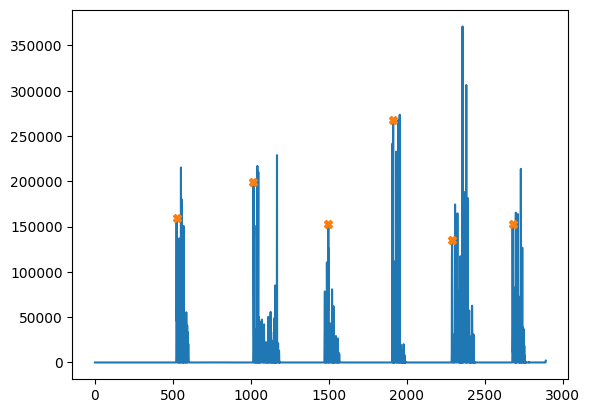

In [ ]:
#detect onset 
odf,_ = dspfunc.spectral_flux(filtered_signal,sr=sr,hop_length=hop_odf)
peaks,_ = dspfunc.pick_onsets_from_flux(odf,sr,hop_odf)
peaks = dspfunc.group_peaks(peaks,sr,hop_odf,group_ms=1000)
plt.plot(odf)
plt.plot(peaks,odf[peaks],'X')

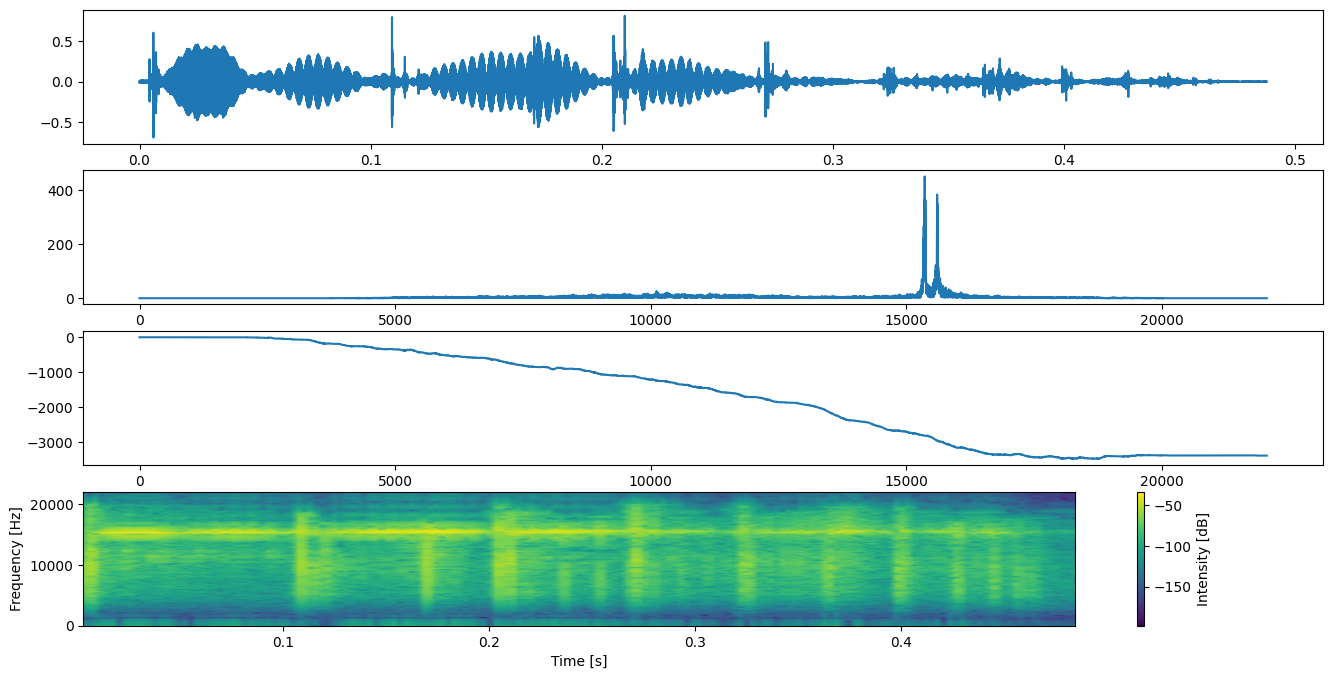

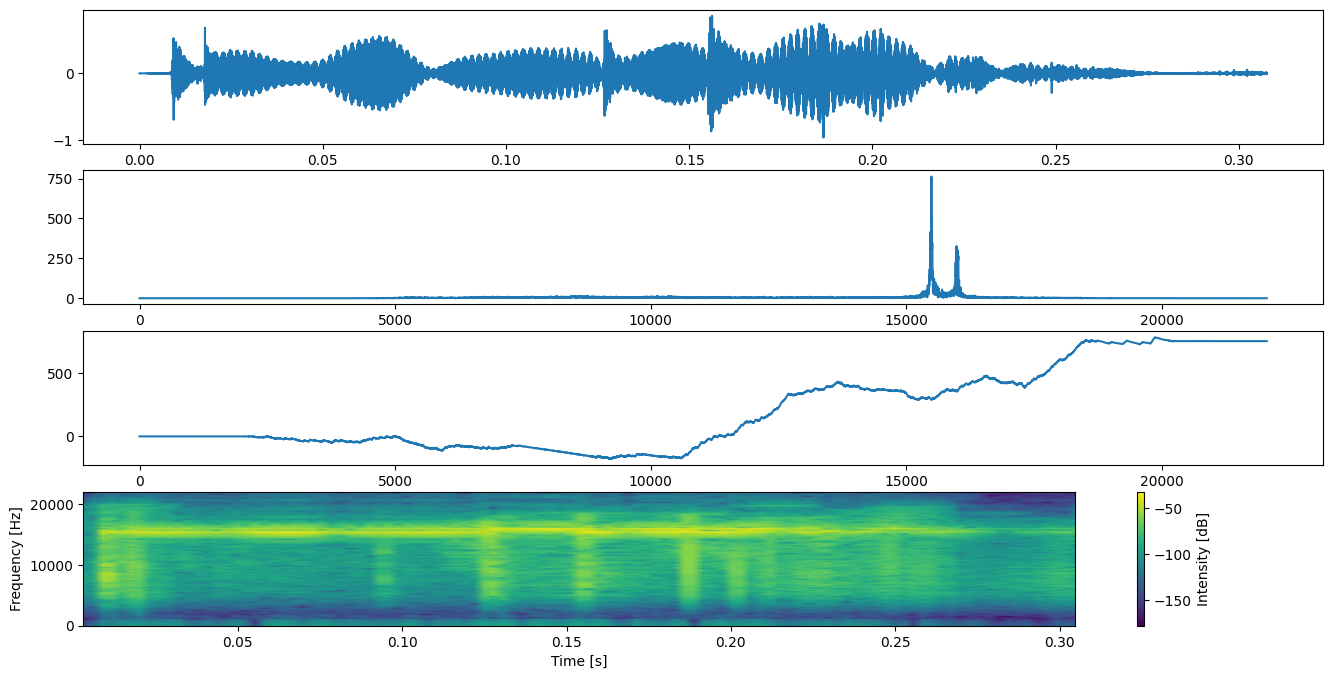

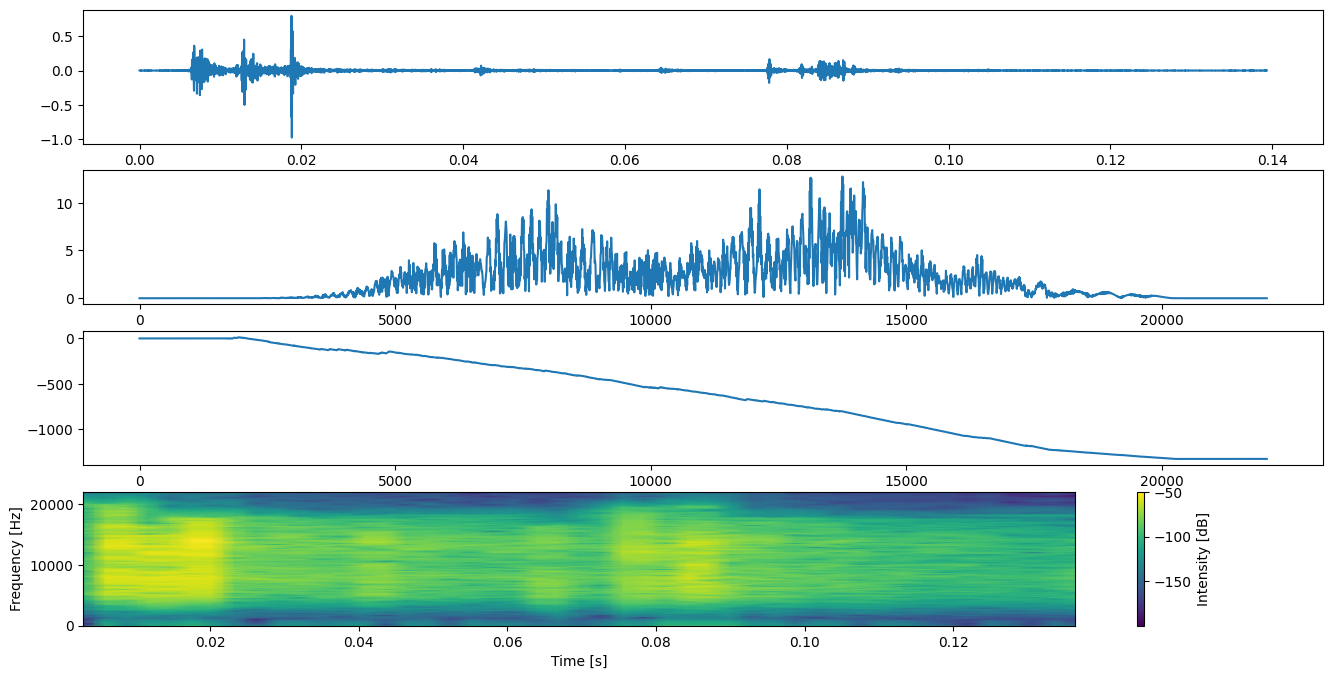

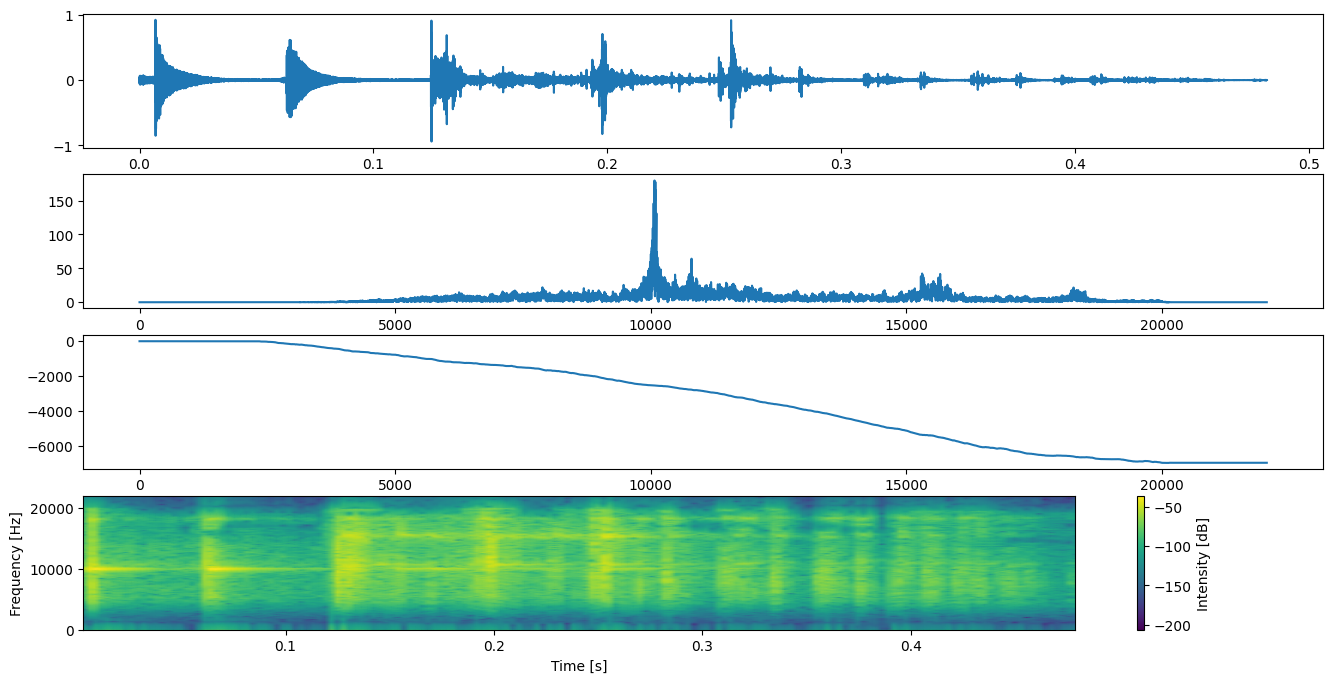

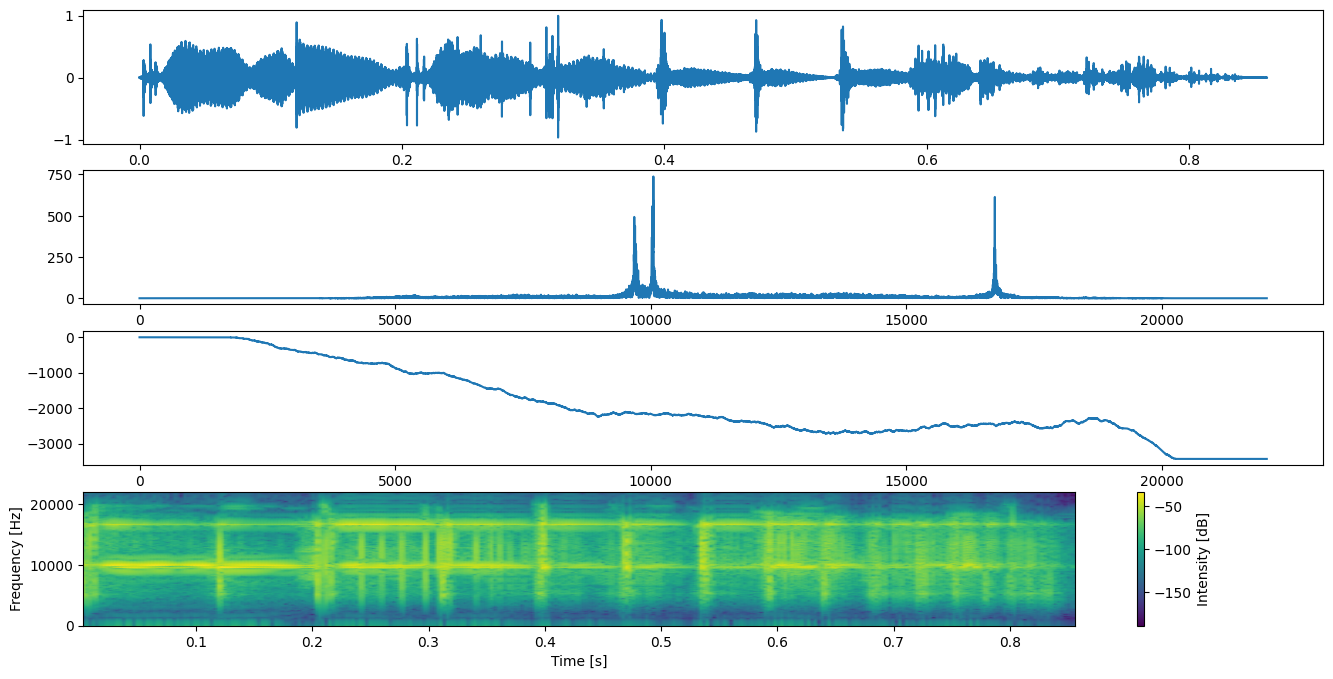

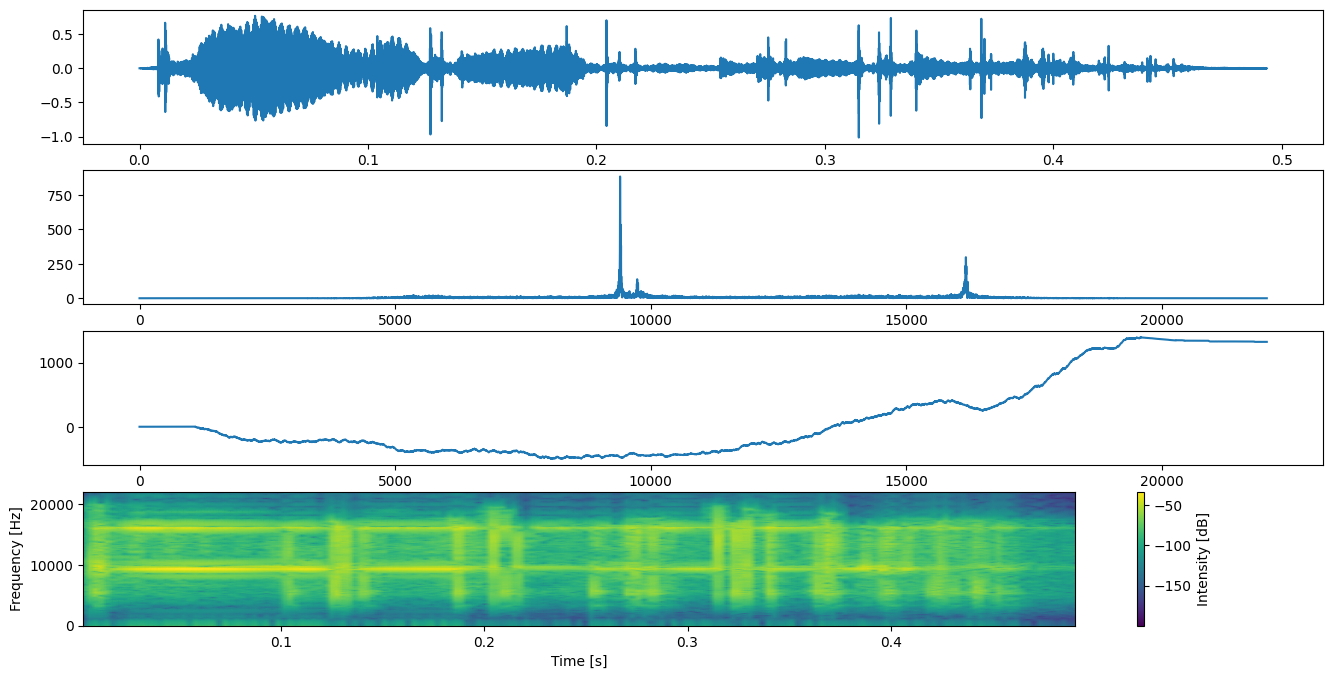

In [30]:
segmented_signal=dspfunc.segment_from_onsets(filtered_signal,sr,peaks,hop_odf)
for s,e in segmented_signal:dspfunc.plot_signal(filtered_signal[s:e],sr)

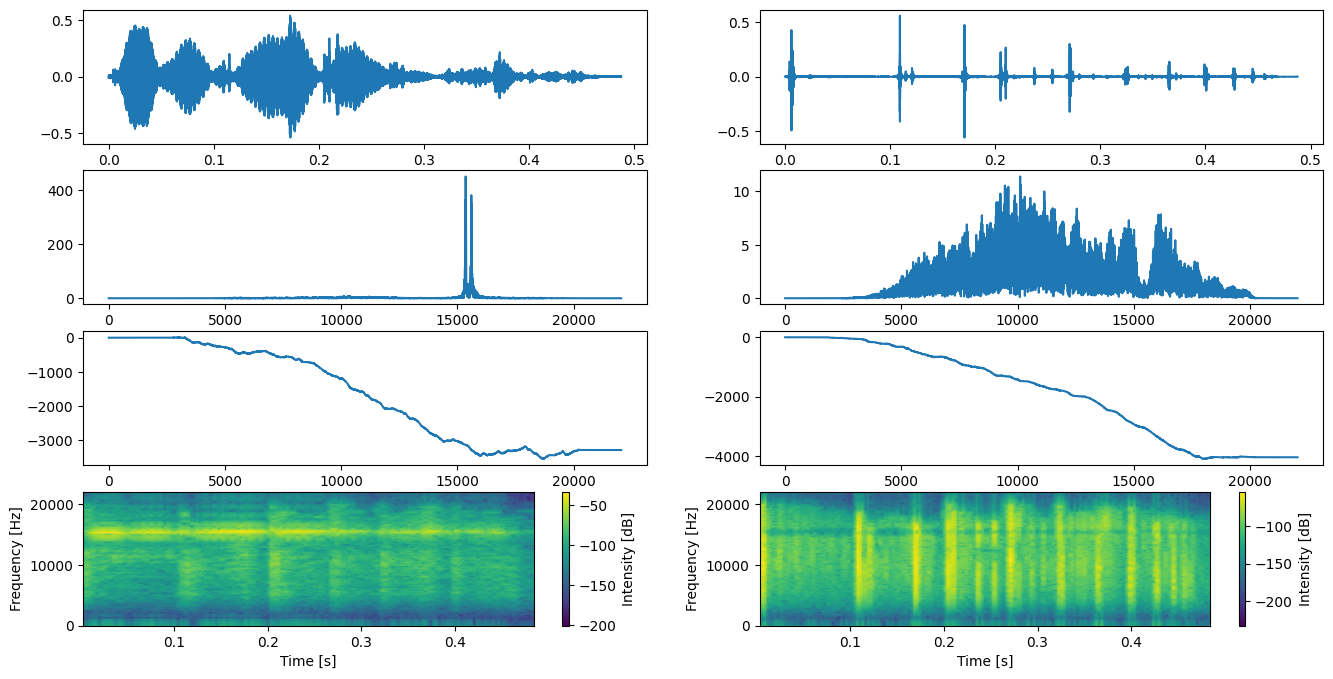

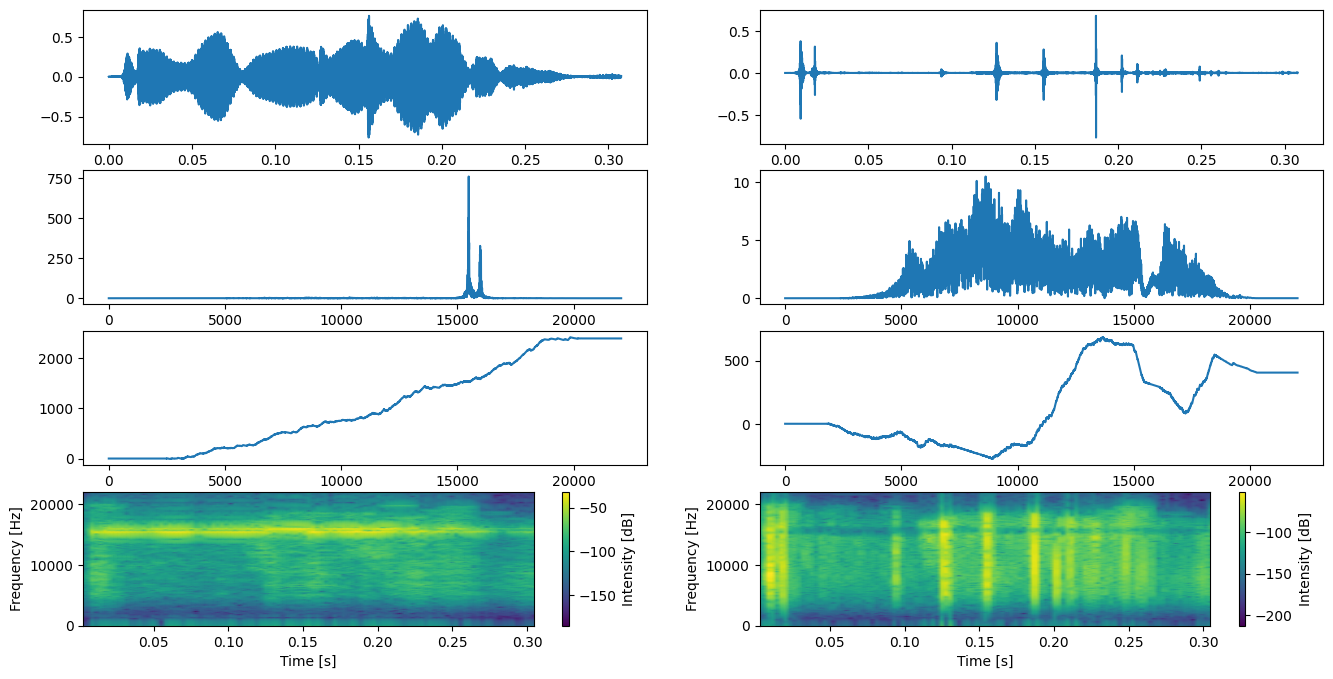

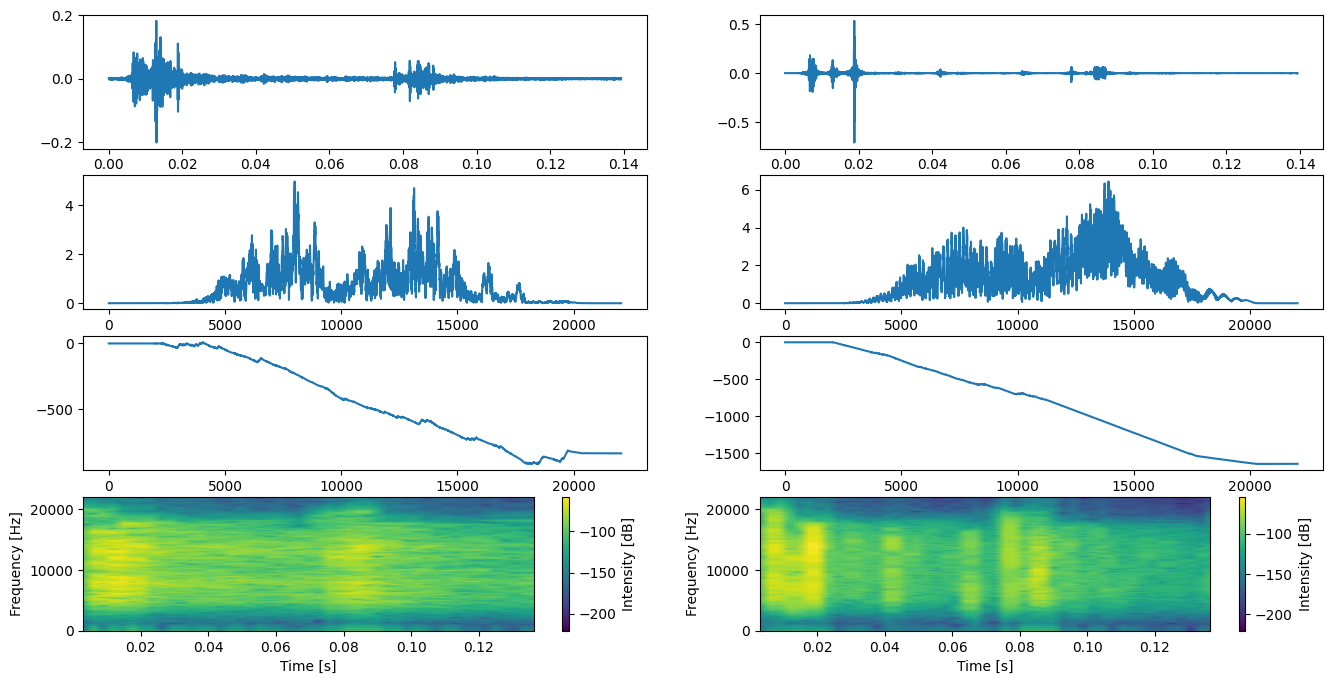

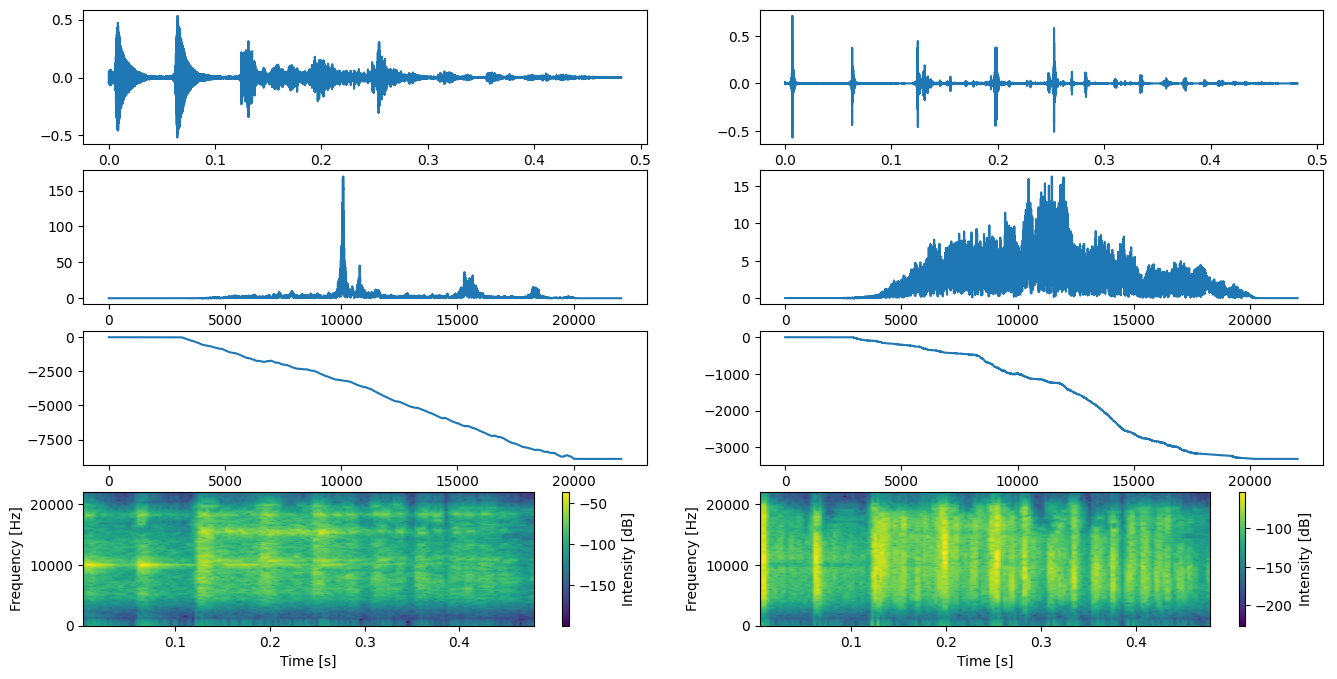

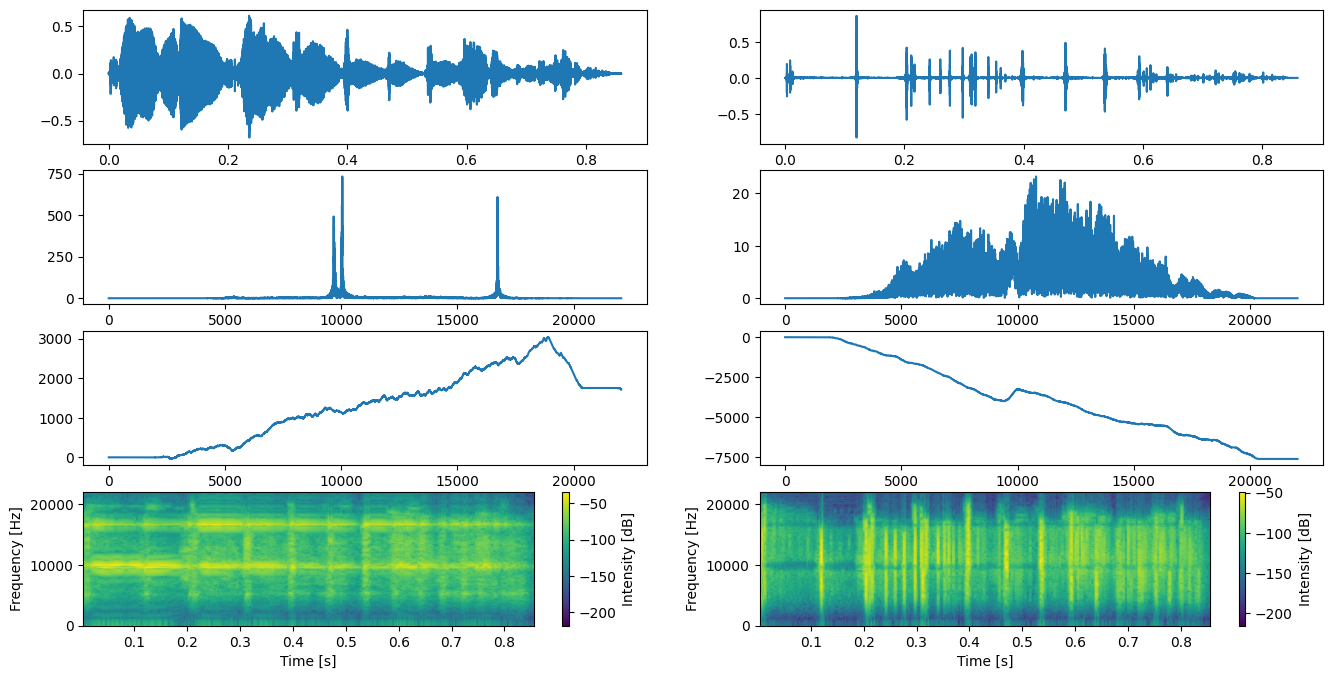

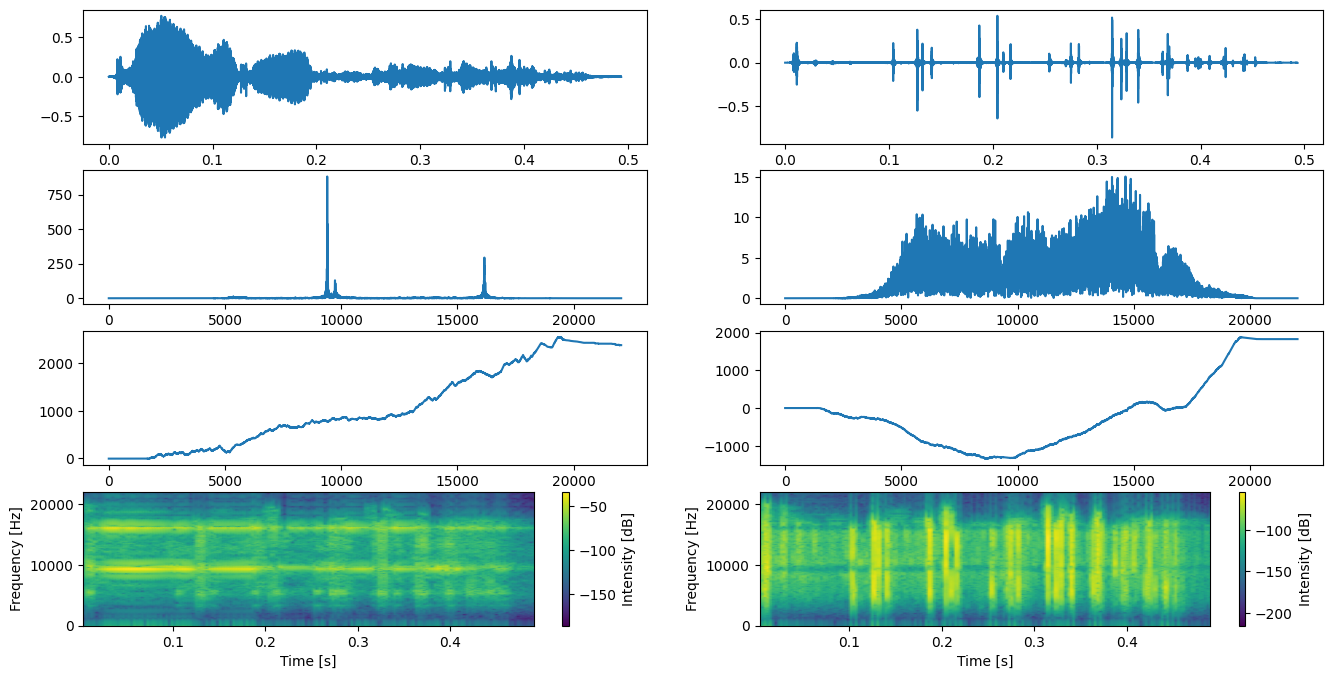

In [ ]:
# compute HPSS
HPSS_signal = [dspfunc.HPSS(filtered_signal[s:e],sr,kernel_size=kernal_size,hop_length=hop,n_fft=n_fft) for s,e in segmented_signal]
for h,p in HPSS_signal:dspfunc.plot_signal_HP(h,p,sr)

In [ ]:
# find coin features 
test_features = np.array([dspfunc.compute_coin_features(filtered_signal[s:e],sr,band_edges_hz=band_edges_hz,kernal_size=kernal_size,n_fft=n_fft,hop=hop) for s,e in segmented_signal])

In [ ]:
# find z for each type of coin for each features and also find overall mean, sd for each features in all type of coin
z_small,z_med,z_large,all_mean,all_sd = dspfunc.get_coin_train_zscore(band_edges_hz,kernal_size,n_fft,hop,train_c1_path,train_c5_path,train_c10_path)

In [35]:
for i in range(len(test_features)):
    c,d0,d1,d2 = dspfunc.find_z_dist(test_features[i],z_small,z_med,z_large,all_mean,all_sd)
    print(f"we found {coin_maping[c]}, [{round(min(d0,d1,d2),3)}] ")
    if min(d0,d1,d2) >5:
        print("  | --> Possible to not be a coin sound")

we found 1 bath, [0.151] 
we found 1 bath, [0.112] 
we found 10 bath, [4.878] 
we found 10 bath, [0.826] 
we found 5 bath, [0.41] 
we found 5 bath, [0.565] 
